In [28]:
import nltk
import re
import string
from nltk.corpus import stopwords
import spacy

In [15]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Reviews.csv")

# Display first 5 rows
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
# Display column names
print("Columns in dataset:", df.columns.tolist())

# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Summary statistics
df.describe()

Columns in dataset: ['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text']
Missing values per column:
 Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [17]:
# Drop irrelevant columns
columns_to_drop = ["Id", "ProductId", "UserId", "ProfileName", "HelpfulnessNumerator", "HelpfulnessDenominator", "Time"]
df.drop(columns=columns_to_drop, inplace=True)

# Show updated DataFrame
df.head()

,Score,Summary,Text
0,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,5,Great taffy,Great taffy at a great price. There was a wid...


In [18]:
# Step 2: Handle Missing Values
# Check for missing values
df.isnull().sum()

Score       0
Summary    27
Text        0
dtype: int64

In [19]:
df.dropna(subset=['Summary'], inplace=True)

In [20]:
# ✅ Keep the original rating scale (1 to 5)
df.loc[:, 'Sentiment'] = df['Score']  # Keep Score instead of binary sentiment

# Show dataset structure
print("Unique values in Score column:", df['Score'].unique())
print("Score distribution:\n", df['Score'].value_counts())

# Drop 'Score' column after assigning to 'Sentiment' (optional)
df.drop(columns=['Score'], inplace=True)

# Display dataset to confirm changes
df.head()


Unique values in Score column: [5 1 4 2 3]
Score distribution:
 Score
5    363122
4     80655
1     52268
3     42638
2     29744
Name: count, dtype: int64


,Summary,Text,Sentiment
0,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,"""Delight"" says it all",This is a confection that has been around a fe...,4
3,Cough Medicine,If you are looking for the secret ingredient i...,2
4,Great taffy,Great taffy at a great price. There was a wid...,5


In [21]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = " ".join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply text cleaning function
df.loc[:, 'Cleaned_Text'] = df['Text'].apply(clean_text)

# Show cleaned dataset
df[['Text', 'Cleaned_Text']].head()

,Text,Cleaned_Text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around centuries light pillowy citr...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


In [23]:
# now, we have a cleaned version of the reviews in Cleaned_Tex

In [24]:
#  Tokenization & Lemmatization
# We will break sentences into words (tokens) and convert them to their base forms.


In [36]:
import spacy

# Load spaCy model with unnecessary components disabled
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
print("spaCy model optimized for lemmatization!")

# Function for batch lemmatization
def batch_lemmatize(texts):
    """
    Processes multiple texts in batches using spaCy's `nlp.pipe()`.
    This speeds up processing compared to using `nlp(text)` one by one.
    """
    docs = list(nlp.pipe(texts))  # Process texts in parallel
    return [" ".join([token.lemma_ for token in doc if token.is_alpha]) for doc in docs]

# ✅ Select only 500-1000 random rows
df_sample = df.sample(n=750, random_state=42)  # Change this value between 500-1000

# Apply batch lemmatization on the selected rows
df_sample.loc[:, 'Processed_Text'] = batch_lemmatize(df_sample['Cleaned_Text'])

# Show processed dataset
df_sample[['Cleaned_Text', 'Processed_Text']].head()

spaCy model optimized for lemmatization!


,Cleaned_Text,Processed_Text
41434,actually tasty pure potatoes great texture nas...,actually tasty pure potato great texture nasty...
209481,realize taste matter personal preference food ...,realize taste matter personal preference food ...
247306,one favorite cup soup choices never carried st...,one favorite cup soup choice never carry store...
80089,like classic taste good margarita likely youll...,like classic taste good margarita likely you l...
218580,willing give chance even reading scathing revi...,willing give chance even read scathing review ...


In [37]:
print("Updated columns in df_sample:", df_sample.columns.tolist())

Updated columns in df_sample: ['Summary', 'Text', 'Sentiment', 'Cleaned_Text', 'Processed_Text']


In [29]:
!pip install seaborn --quiet

In [30]:
import seaborn as sns
print("Seaborn installed successfully!")

Seaborn installed successfully!


/tmp/ipykernel_23193/65861799.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Sentiment'], palette="viridis")


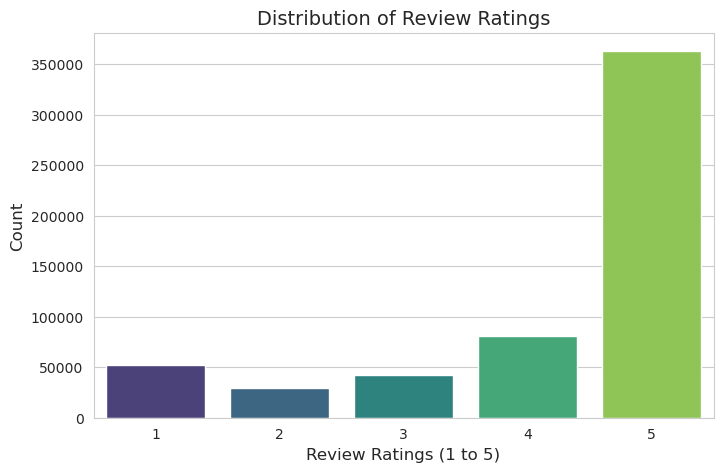

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plot sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['Sentiment'], palette="viridis")

# Labels & Title
plt.xlabel("Review Ratings (1 to 5)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Distribution of Review Ratings", fontsize=14)
plt.show()

In [32]:
# Show counts of each rating
df['Sentiment'].value_counts(normalize=True) * 100

Sentiment
5    63.881906
4    14.189157
1     9.195200
3     7.501051
2     5.232686
Name: proportion, dtype: float64

In [34]:
print("Available columns:", df.columns.tolist())

Available columns: ['Summary', 'Text', 'Sentiment', 'Cleaned_Text']


In [38]:
from collections import Counter

# Combine all reviews into one large string
all_words = " ".join(df_sample['Processed_Text'])

# Split into words and count frequency
word_freq = Counter(all_words.split())

# Show most common words
print("Most Common Words:", word_freq.most_common(20))

Most Common Words: [('not', 433), ('like', 378), ('good', 321), ('taste', 319), ('one', 267), ('coffee', 250), ('love', 245), ('food', 244), ('get', 244), ('flavor', 244), ('product', 242), ('I', 241), ('try', 234), ('do', 229), ('make', 217), ('great', 213), ('use', 209), ('buy', 202), ('well', 192), ('would', 189)]


In [2]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 30.0 MB/s eta 0:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB
None
   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                        

/tmp/ipykernel_30252/1493394423.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df_filtered, palette="RdBu")


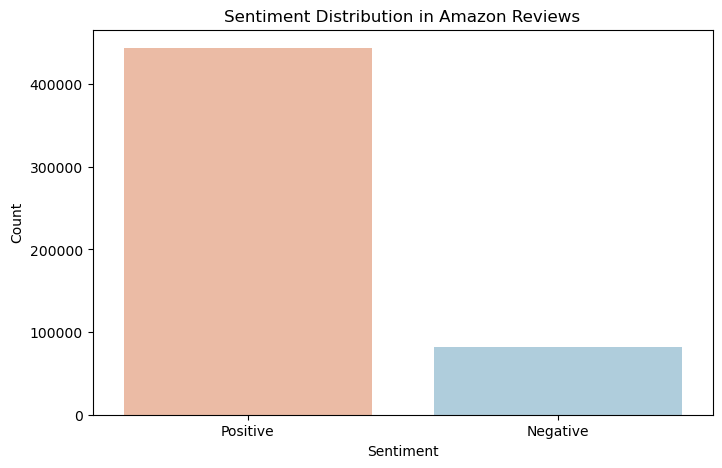

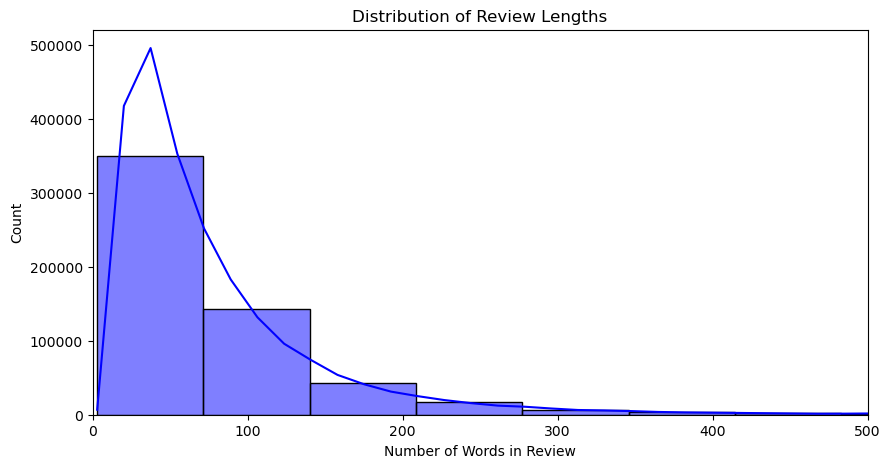

[nltk_data] Downloading package stopwords to /home/sagemaker-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


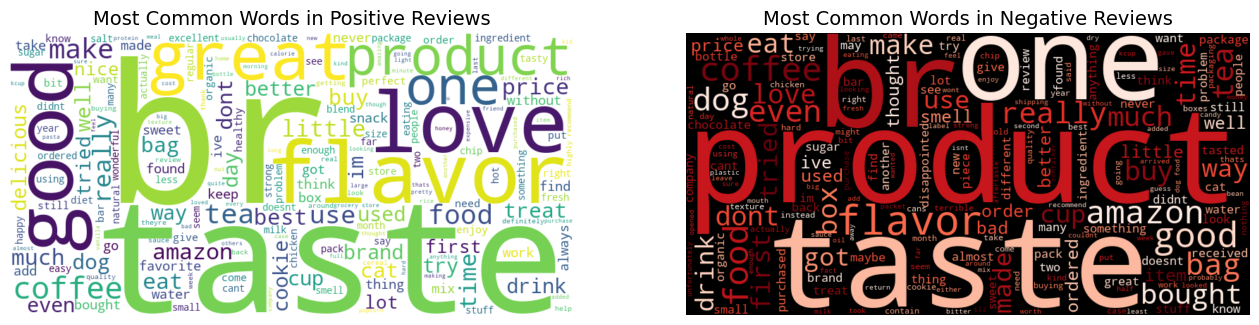

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.util import ngrams
import nltk
from nltk.corpus import stopwords

# Load the dataset
df = pd.read_csv("Reviews.csv")

# Display dataset info
print(df.info())
print(df.head())

# Convert Score into Sentiment labels
df["Sentiment"] = df["Score"].apply(lambda x: "Positive" if x > 3 else ("Negative" if x < 3 else "Neutral"))

# Remove neutral reviews for clearer sentiment analysis
df_filtered = df[df["Sentiment"] != "Neutral"]

# 📊 1. Sentiment Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Sentiment", data=df_filtered, palette="RdBu")
plt.title("Sentiment Distribution in Amazon Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# 📏 2. Review Length Distribution
df["Review_Length"] = df["Text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 5))
sns.histplot(df["Review_Length"], bins=50, kde=True, color="blue")
plt.title("Distribution of Review Lengths")
plt.xlabel("Number of Words in Review")
plt.ylabel("Count")
plt.xlim(0, 500)  # Focus on reasonable length range
plt.show()

# 📝 3. Word Cloud for Positive & Negative Reviews
nltk.download("stopwords")
stop_words = set(stopwords.words("english"))

def clean_text(text):
    """Clean text by removing stopwords, punctuation, and special characters."""
    text = re.sub(r"[^\w\s]", "", text)  # Remove punctuation
    text = " ".join([word.lower() for word in text.split() if word.lower() not in stop_words])
    return text

# Sample 2,000 reviews per sentiment for efficiency
positive_sample = " ".join(df[df["Sentiment"] == "Positive"]["Text"].dropna().sample(2000, random_state=42).apply(clean_text))
negative_sample = " ".join(df[df["Sentiment"] == "Negative"]["Text"].dropna().sample(2000, random_state=42).apply(clean_text))

wordcloud_positive = WordCloud(width=800, height=400, background_color="white").generate(positive_sample)
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_sample)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].imshow(wordcloud_positive, interpolation="bilinear")
ax[0].set_title("Most Common Words in Positive Reviews", fontsize=14)
ax[0].axis("off")

ax[1].imshow(wordcloud_negative, interpolation="bilinear")
ax[1].set_title("Most Common Words in Negative Reviews", fontsize=14)
ax[1].axis("off")

plt.show()

# 🔤 4. N-Grams Analysis (Top Words in Reviews)
def get_top_ngrams(text_series, n=2, top_k=10):
    """Extract and return the most common n-grams from text data."""
    all_text = " ".join(text_series.dropna().apply(clean_text))
    ngrams_list = list(ngrams(all_text.split(), n))
    return Counter(ngrams_list).most_common(top_k)

# Top bigrams for positive and negative reviews
positive_bigrams = get_top_ngrams(df[df["Sentiment"] == "Positive"]["Text"], n=2, top_k=10)
negative_bigrams = get_top_ngrams(df[df["Sentiment"] == "Negative"]["Text"], n=2, top_k=10)

# Convert results to DataFrame for visualization
positive_bigrams_df = pd.DataFrame(positive_bigrams, columns=["Bigram", "Count"])
negative_bigrams_df = pd.DataFrame(negative_bigrams, columns=["Bigram", "Count"])

# Plot Top Bigrams
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(y=positive_bigrams_df["Bigram"].astype(str), x=positive_bigrams_df["Count"], ax=ax[0], palette="Blues_r")
ax[0].set_title("Top Bigrams in Positive Reviews")

sns.barplot(y=negative_bigrams_df["Bigram"].astype(str), x=negative_bigrams_df["Count"], ax=ax[1], palette="Reds_r")
ax[1].set_title("Top Bigrams in Negative Reviews")

plt.show()

# 📈 5. Helpfulness Trends (Usefulness of Reviews)
df["Usefulness"] = (df["HelpfulnessNumerator"] / df["HelpfulnessDenominator"]).apply(
    lambda n: ">75%" if n > 0.75 else ("<25%" if n < 0.25 else ("25-75%" if n >= 0.25 and n <= 0.75 else "useless"))
)
df.loc[df.HelpfulnessDenominator == 0, "Usefulness"] = "useless"

plt.figure(figsize=(8, 5))
sns.countplot(x="Usefulness", data=df, palette="coolwarm", order=["useless", "<25%", "25-75%", ">75%"])
plt.title("Distribution of Review Usefulness")
plt.xlabel("Usefulness Category")
plt.ylabel("Count")
plt.show()

# 🕒 6. Time-Based Trends (Optional)
df["Review_Date"] = pd.to_datetime(df["Time"], unit="s")

plt.figure(figsize=(12, 6))
df.set_index("Review_Date").resample("M")["Score"].mean().plot(color="purple")
plt.title("Average Review Score Over Time")
plt.xlabel("Year")
plt.ylabel("Average Score")
plt.show()

Top 10 most frequent reviewers:
UserId
A3OXHLG6DIBRW8    448
A1YUL9PCJR3JTY    421
AY12DBB0U420B     389
A281NPSIMI1C2R    365
A1Z54EM24Y40LL    256
A1TMAVN4CEM8U8    204
A2MUGFV2TDQ47K    201
A3TVZM3ZIXG8YW    199
A3PJZ8TU8FDQ1K    178
AQQLWCMRNDFGI     176
Name: count, dtype: int64


/tmp/ipykernel_11115/2750587404.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviewer_counts.head(10).index, y=reviewer_counts.head(10).values, palette="Blues_r")


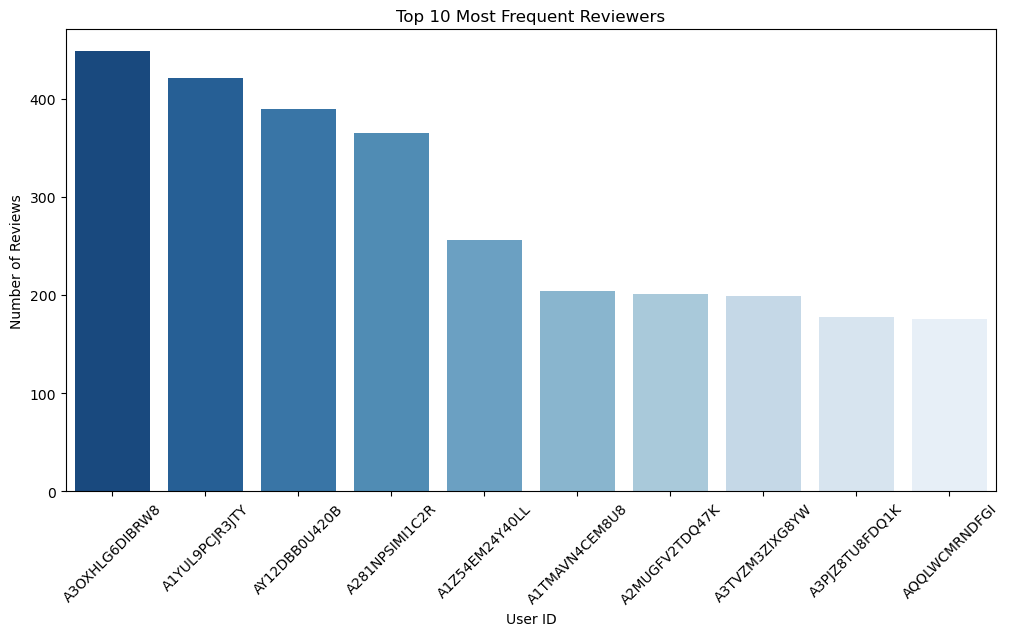

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("Reviews.csv")

# Count the number of reviews per UserId
reviewer_counts = df["UserId"].value_counts()

# Display the top 10 most frequent reviewers
print("Top 10 most frequent reviewers:")
print(reviewer_counts.head(10))

# Plot the top 10 most frequent reviewers
plt.figure(figsize=(12, 6))
sns.barplot(x=reviewer_counts.head(10).index, y=reviewer_counts.head(10).values, palette="Blues_r")
plt.xticks(rotation=45)
plt.title("Top 10 Most Frequent Reviewers")
plt.xlabel("User ID")
plt.ylabel("Number of Reviews")
plt.show()

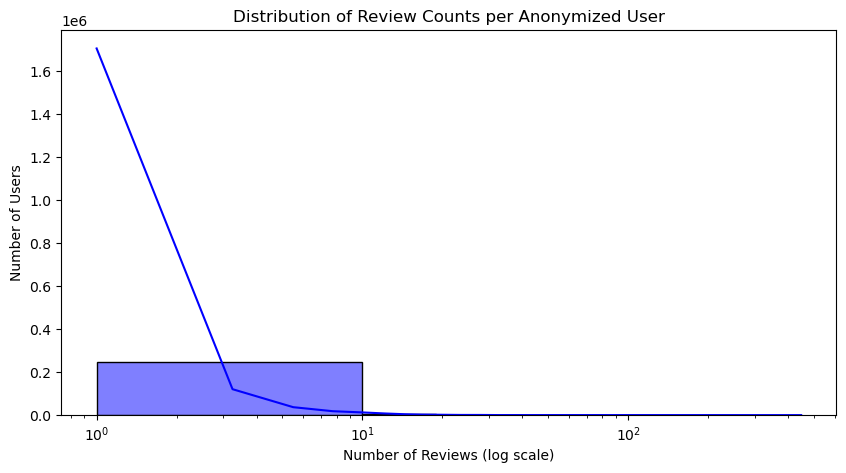

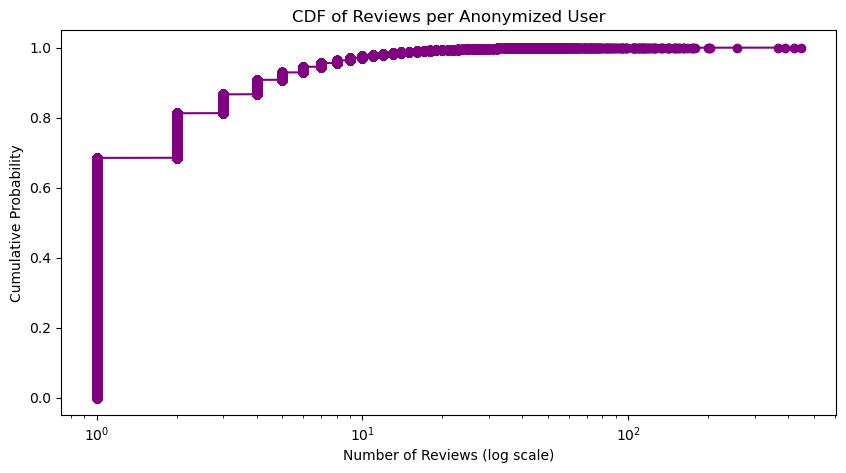

/tmp/ipykernel_11115/1413839480.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=anon_user_counts.head(10).index, y=anon_user_counts.head(10).values, palette="coolwarm")


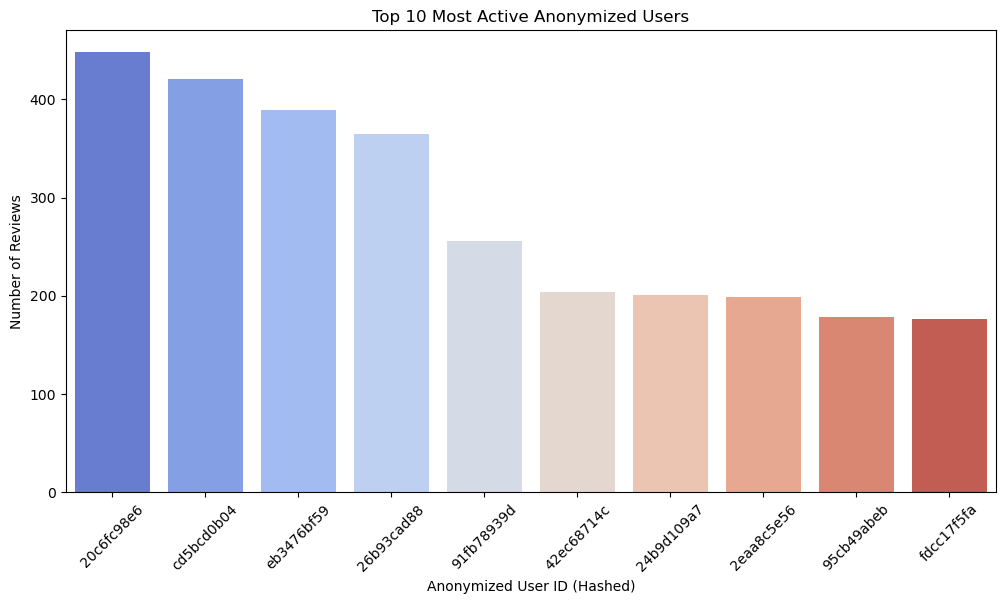

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import numpy as np

# Load dataset
df = pd.read_csv("Reviews.csv")

# Function to hash UserId
def hash_user(user_id):
    return hashlib.sha256(user_id.encode()).hexdigest()[:10]  # Shorten for visualization

# Apply hashing to anonymize users
df["AnonUserId"] = df["UserId"].apply(hash_user)

# Count reviews per anonymous user
anon_user_counts = df["AnonUserId"].value_counts()

# 📊 1. Distribution of Review Counts per Anonymized User
plt.figure(figsize=(10, 5))
sns.histplot(anon_user_counts, bins=50, kde=True, color="blue")
plt.xscale("log")  # Log scale for better visibility
plt.title("Distribution of Review Counts per Anonymized User")
plt.xlabel("Number of Reviews (log scale)")
plt.ylabel("Number of Users")
plt.show()

# 📈 2. Cumulative Distribution Function (CDF) of Reviews per User
sorted_counts = np.sort(anon_user_counts.values)
cdf = np.arange(len(sorted_counts)) / len(sorted_counts)

plt.figure(figsize=(10, 5))
plt.plot(sorted_counts, cdf, marker="o", linestyle="-", color="purple")
plt.xscale("log")
plt.title("CDF of Reviews per Anonymized User")
plt.xlabel("Number of Reviews (log scale)")
plt.ylabel("Cumulative Probability")
plt.show()

# 📌 3. Top 10 Most Active Anonymized Users
plt.figure(figsize=(12, 6))
sns.barplot(x=anon_user_counts.head(10).index, y=anon_user_counts.head(10).values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Most Active Anonymized Users")
plt.xlabel("Anonymized User ID (Hashed)")
plt.ylabel("Number of Reviews")
plt.show()